Cloning into 'codesoft_swayam'...


In [ ]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,mean_absolute_error
from sklearn.impute import SimpleImputer

In [ ]:
# Upload your file
from google.colab import files
uploaded = files.upload()  # This opens a dialog to upload the file

df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')
# Display the first few rows
df.head()

Saving IMDb Movies India.csv to IMDb Movies India.csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.shape

(15509, 10)

data cleaning

In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.isnull().sum().sum()

33523

In [ ]:
df.isnull().sum().sum()/(df.shape[0]*(df.shape[1]))*100 #percentage of Null values in whole data

21.615191179315236

In [ ]:
# null value percentage per columns
missing_values_percentage = df.isnull().sum() / len(df) * 100
missing_values_percentage

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


In [ ]:
# drop null data
drop=df.dropna(inplace=True)
drop

In [ ]:
df.isnull().sum().sum()/(df.shape[0]*(df.shape[1]))*100 #percentage of Null values in whole data

0.0

In [ ]:
df.duplicated().sum() # number of duplicate data

0

numerical information

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [ ]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)


In [ ]:
df['Genre_Average_Rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_Average_Rating'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor1_Average_Rating'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor2_Average_Rating'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor3_Average_Rating'] = df.groupby('Actor 3')['Rating'].transform('mean')

model training

In [ ]:
# define target and feature
X = df[['Year', 'Votes', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

Unique values in 'Rating' column before cleaning: [ 7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6  7.3
  7.1  6.9  3.5  4.5  6.4  4.1  4.8  8.1  5.5  6.8  5.   6.1  7.7  5.1
  3.3  7.8  8.4  4.3  5.8  7.5  3.6  4.6  4.2  5.3  5.4  3.   8.   6.
  3.1  3.8  7.9  2.7  2.4  7.6  6.7  3.4  5.2  4.9  2.8  3.7  3.9  3.2
  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.5  2.3  8.5  8.6  2.6  1.7  9.
  1.4  8.9  1.9  9.4  9.7  1.8  9.2  2.   9.1 10.   1.6  2.2  1.1]
Unique values in 'Rating' column after cleaning: [ 7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6  7.3
  7.1  6.9  3.5  4.5  6.4  4.1  4.8  8.1  5.5  6.8  5.   6.1  7.7  5.1
  3.3  7.8  8.4  4.3  5.8  7.5  3.6  4.6  4.2  5.3  5.4  3.   8.   6.
  3.1  3.8  7.9  2.7  2.4  7.6  6.7  3.4  5.2  4.9  2.8  3.7  3.9  3.2
  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.5  2.3  8.5  8.6  2.6  1.7  9.
  1.4  8.9  1.9  9.4  9.7  1.8  9.2  2.   9.1 10.   1.6  2.2  1.1]
Unique values in 'Votes' column before cleaning: ['8' '35' '8

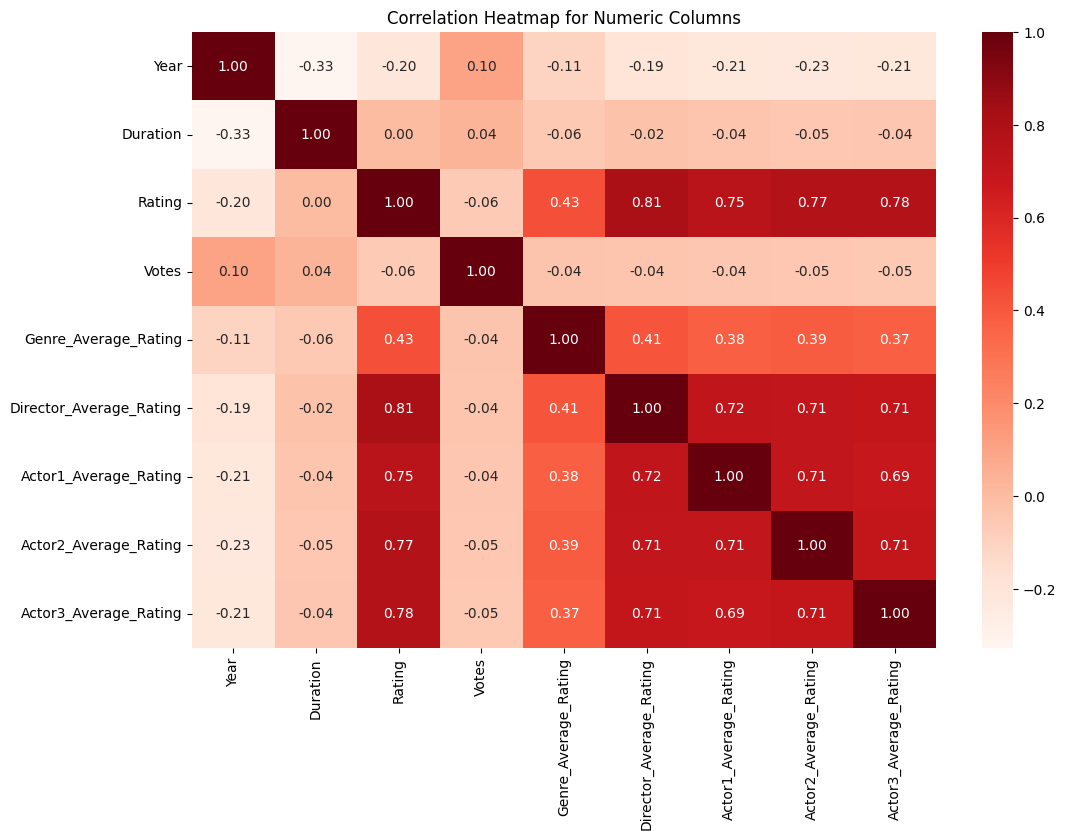

Random Forest Mean Squared Error: 0.38473747879858655
Linear Regression Mean Squared Error: 0.4309157525513216


In [ ]:
print("Unique values in 'Rating' column before cleaning:", df['Rating'].unique())
print("Unique values in 'Rating' column after cleaning:", df['Rating'].unique())
print("Unique values in 'Votes' column before cleaning:", df['Votes'].unique())
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
print("Unique values in 'Votes' column after cleaning:", df['Votes'].unique())
print("Unique values in 'Year' column before cleaning:", df['Year'].unique())
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print("Unique values in 'Year' column after cleaning:", df['Year'].unique())
print("Unique values in 'Duration' column before cleaning:", df['Duration'].unique())
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
print("Unique values in 'Duration' column after cleaning:", df['Duration'].unique())

categorical_columns = []
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = df.select_dtypes(include=[np.number])
df = df.dropna(subset=['Rating'])

X = df.drop(columns=['Rating'])
y = df['Rating']

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)
linear_regression_model = LinearRegression()

random_forest_model.fit(X_train, y_train)
linear_regression_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
y_pred_lr = linear_regression_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Data types in the dataset:")
print(df.dtypes)
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.fillna(numeric_df.median(), inplace=True)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Linear Regression Mean Squared Error: {mse_lr}")

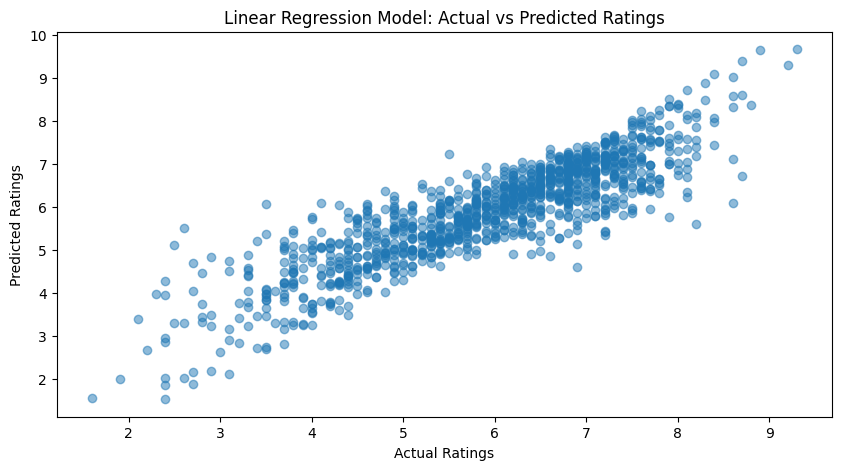

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


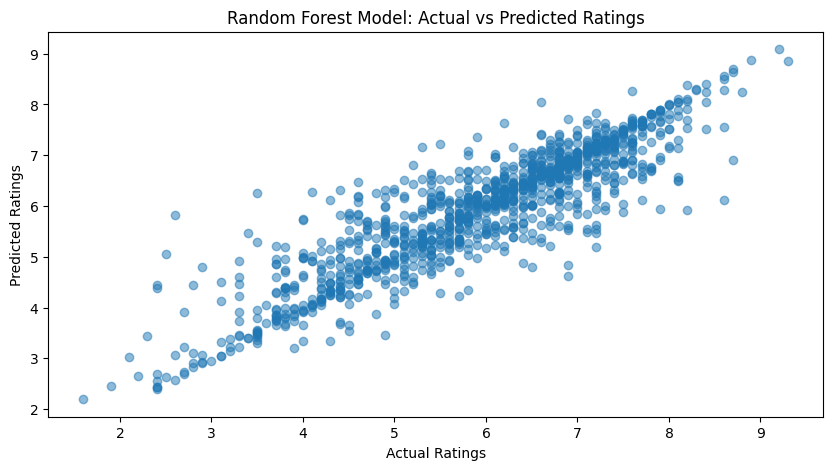

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [ ]:
y_pred_rf = random_forest_model.predict(X_test)
print("Performance Evaluation for Random Forest Model:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")


Performance Evaluation for Random Forest Model:
Mean Squared Error: 0.38473747879858655
Mean Absolute Error: 0.42001060070671375
R2 Score: 0.7922296211992341
